In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
subject = pd.read_csv('subject-info.csv')
measure = pd.read_csv('test_measure.csv')
measure, subject

(        time  Speed     HR     VO2    VCO2  RR    VE ID_test   ID
 0          0    5.0   63.0   478.0   360.0  27  13.3     2_1    2
 1          2    5.0   75.0   401.0   295.0  23  10.3     2_1    2
 2          4    5.0   82.0   449.0   319.0  29  12.2     2_1    2
 3          7    5.0   87.0   461.0   340.0  28  12.8     2_1    2
 4          9    5.0   92.0   574.0   417.0  28  14.6     2_1    2
 ...      ...    ...    ...     ...     ...  ..   ...     ...  ...
 575082   926    5.0  148.0  1350.0  1699.0  35  65.7   857_1  857
 575083   927    5.0  147.0  1275.0  1605.0  32  60.1   857_1  857
 575084   929    5.0  147.0  1259.0  1566.0  29  57.0   857_1  857
 575085   931    5.0  147.0  1278.0  1587.0  31  58.5   857_1  857
 575086   933    5.0  147.0  1299.0  1600.0  31  58.7   857_1  857
 
 [575087 rows x 9 columns],
       Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
 0    10.8    48.8   163.0      39.0         20.7    1  543   543_1
 1    11.8    41.0   150.0    

In [4]:
measure_subject = pd.merge(measure, subject, on='ID')

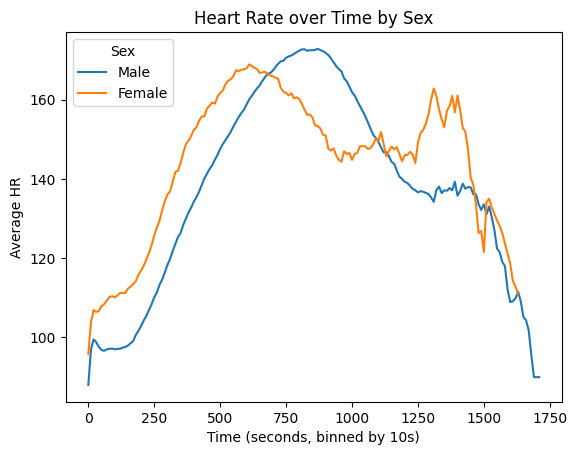

In [19]:
measure_subject['time_bin'] = (measure_subject['time'] // 10) * 10

average = measure_subject[['Sex', 'time_bin', 'HR']].groupby(['Sex', 'time_bin']).mean().reset_index()
average['Sex'] = average['Sex'].map({0: 'Male', 1: 'Female'})

sns.lineplot(data=average, x='time_bin', y='HR', hue='Sex')
plt.xlabel('Time (seconds, binned by 10s)')
plt.ylabel('Average HR')
plt.title('Heart Rate over Time by Sex')
plt.show()

In [23]:
measure_subject['Speed'].describe()

,Speed
count,773618.000000
mean,9.731879
std,4.578232
min,0.000000
25%,5.000000
50%,9.100000
75%,13.700000
max,23.100000


In [27]:
measure_subject.groupby('ID')['Speed'].max()

,Speed
ID,
1,18.1
2,16.3
3,18.1
4,16.2
5,14.4
...,...
853,14.1
854,11.4
855,18.1


In [28]:
measure_subject.groupby('ID')['Speed'].min()

,Speed
ID,
1,0.0
2,5.0
3,5.0
4,0.0
5,5.0
...,...
853,4.9
854,4.0
855,0.0


<ipython-input-70-38014d4b2dc3>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_hr = measure_subject.groupby(["time_into_recovery", "age_group"])["HR"].mean().reset_index()


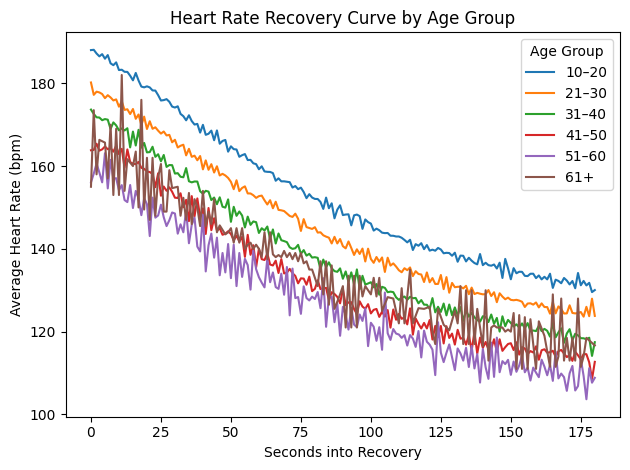

In [70]:
tmax = measure_subject.groupby("ID_test")["time"].max().reset_index()
tmax.columns = ["ID_test", "t_max"]
if "t_max" in measure_subject.columns:
    measure_subject = measure_subject.drop(columns=["t_max"])

measure_subject = pd.merge(measure_subject, tmax, on="ID_test")

measure_subject = measure_subject[measure_subject["time"] >= measure_subject["t_max"] - 180].copy()
measure_subject["time_into_recovery"] = measure_subject["time"] - (measure_subject["t_max"] - 180)

bins = [10, 20, 30, 40, 50, 60, 70]
labels = ["10–20", "21–30", "31–40", "41–50", "51–60", "61+"]
measure_subject["age_group"] = pd.cut(measure_subject["Age"], bins=bins, labels=labels, right=False)

avg_hr = measure_subject.groupby(["time_into_recovery", "age_group"])["HR"].mean().reset_index()

sns.lineplot(data=avg_hr, x="time_into_recovery", y="HR", hue="age_group")
plt.xlabel("Seconds into Recovery")
plt.ylabel("Average Heart Rate (bpm)")
plt.title("Heart Rate Recovery Curve by Age Group")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()
